In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housingData = pd.read_csv('housing.csv')

In [5]:
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
X = housingData.iloc[:, :-1].values
y = housingData.iloc[:, [-1]].values

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X[:, :-1] = imputer.fit_transform(X[:, :-1])
y = imputer.fit_transform(y)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, -1] = le.fit_transform(X[:, -1])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [11]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error
rmse_linear = mean_squared_error(y_test, y_pred_linear) ** 0.5
print("Root mean squared error (RMSE) from Linear Regression:", rmse_linear)

Root mean squared error (RMSE) from Linear Regression: 0.6035793323400575


In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse_dt = mean_squared_error(y_test, y_pred_dt) ** 0.5
print("Root mean squared error (RMSE) from Decision Tree Regression:", rmse_dt)

Root mean squared error (RMSE) from Decision Tree Regression: 0.5828383817085018


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
rmse_rf = mean_squared_error(y_test, y_pred_rf) ** 0.5
print("Root mean squared error (RMSE) from Random Forest Regression:", rmse_rf)

C:\Users\aliha\AppData\Local\Temp\ipykernel_8720\3132510764.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


Root mean squared error (RMSE) from Random Forest Regression: 0.422355162203443


In [15]:
X_train_median_income = X_train[:, [7]]
X_test_median_income = X_test[:, [7]]
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_train_median_income, y_train)
y_pred_linear_2 = linear_regressor_2.predict(X_test_median_income)

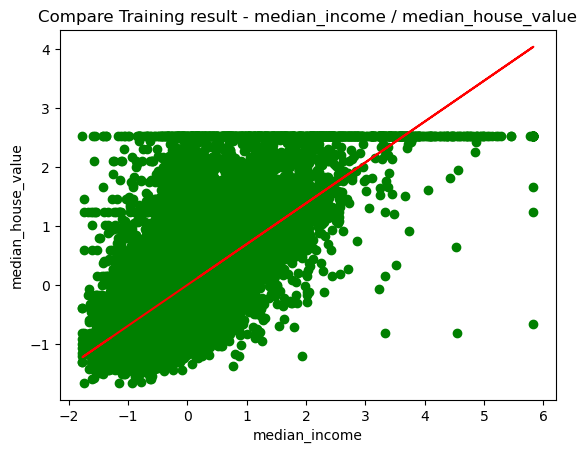

In [16]:
plt.scatter(X_train_median_income, y_train, color='green')
plt.plot(X_train_median_income, linear_regressor_2.predict(X_train_median_income), color='red')
plt.title('Compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

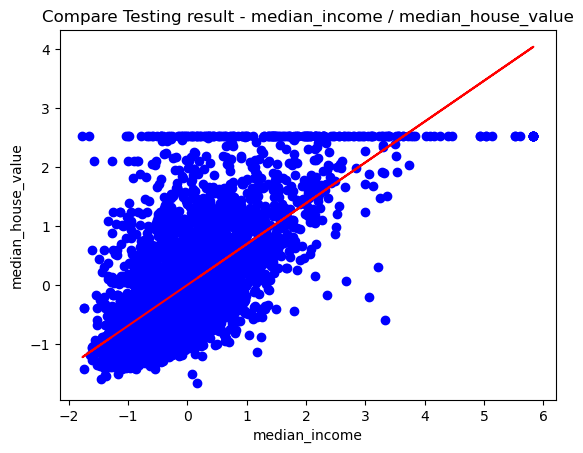

In [17]:
plt.scatter(X_test_median_income, y_test, color='blue')
plt.plot(X_train_median_income, linear_regressor_2.predict(X_train_median_income), color='red')
plt.title('Compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

In [18]:
from sklearn.metrics import r2_score
r2_score_linear_2 = r2_score(y_test, y_pred_linear_2)
print("R-squared score from Linear Regression with one independent variable:", r2_score_linear_2)

R-squared score from Linear Regression with one independent variable: 0.4466846804895944


In [19]:
print("RMSE for Linear Regression:", rmse_linear)
print("RMSE for Decision Tree Regression:", rmse_dt)
print("RMSE for Random Forest Regression:", rmse_rf)
print("R-squared score from Linear Regression with one independent variable:", r2_score_linear_2)

RMSE for Linear Regression: 0.6035793323400575
RMSE for Decision Tree Regression: 0.5828383817085018
RMSE for Random Forest Regression: 0.422355162203443
R-squared score from Linear Regression with one independent variable: 0.4466846804895944


In [21]:
new_features = np.array([5.0]).reshape(1, -1)
predicted_price = linear_regressor_2.predict(new_features)
print("Tahmin edilen ev fiyatı:", predicted_price)

Tahmin edilen ev fiyatı: [[3.46379173]]
